In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 28*28))
x_test  = tf.reshape(x_test, (-1, 28*28))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [2]:
# data normalization

mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/std
x_test  = (x_test-mean)/std

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

initializer = tf.keras.initializers.Zeros()

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(256, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [4]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, epochs=10, verbose=2)

Epoch 1/10
235/235 - 3s - loss: 2.3026 - sparse_categorical_accuracy: 0.0960 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 3s/epoch - 14ms/step
Epoch 2/10
235/235 - 2s - loss: 2.3026 - sparse_categorical_accuracy: 0.0958 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 2s/epoch - 8ms/step
Epoch 3/10
235/235 - 2s - loss: 2.3026 - sparse_categorical_accuracy: 0.0972 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 2s/epoch - 8ms/step
Epoch 4/10
235/235 - 2s - loss: 2.3026 - sparse_categorical_accuracy: 0.0977 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 2s/epoch - 8ms/step
Epoch 5/10
235/235 - 2s - loss: 2.3026 - sparse_categorical_accuracy: 0.0977 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 2s/epoch - 8ms/step
Epoch 6/10
235/235 - 2s - loss: 2.3026 - sparse_categorical_accuracy: 0.0953 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1000 - 2s/epoch - 8ms/step
Epoch 7/10
235/235 - 2s - loss: 2.3026 

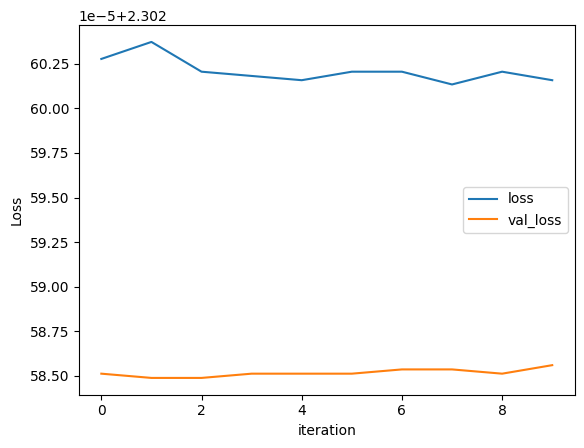

In [5]:
import matplotlib.pyplot as plt
#%matplotlib qt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

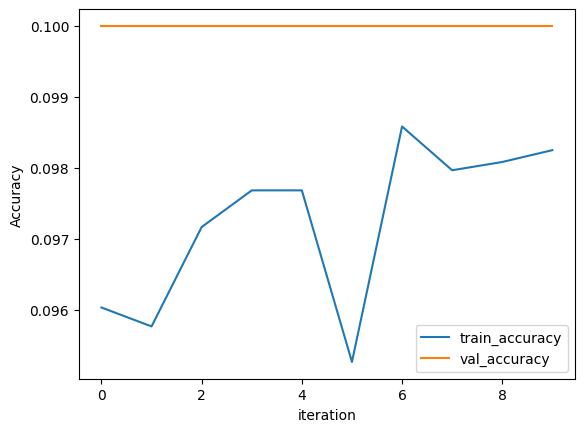

In [6]:
import matplotlib.pyplot as plt
#%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
model.layers[0].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [8]:
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 8.0366596e-04,  2.3187842e-04,  7.6769630e-04, -8.6651300e-04,
         2.0550596e-04, -6.2976289e-04, -5.1355490e-04,  5.1105133e-04,
        -3.4585028e-05, -4.7535304e-04], dtype=float32)]

In [10]:
hidden = x_test@model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]
print(hidden)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 256), dtype=float32)


In [12]:
output = hidden@model.layers[1].get_weights()[0] + model.layers[1].get_weights()[1]
print(output[0])

tf.Tensor(
[ 8.0366596e-04  2.3187842e-04  7.6769630e-04 -8.6651300e-04
  2.0550596e-04 -6.2976289e-04 -5.1355490e-04  5.1105133e-04
 -3.4585028e-05 -4.7535304e-04], shape=(10,), dtype=float32)


In [13]:
print(output)

tf.Tensor(
[[ 8.0366596e-04  2.3187842e-04  7.6769630e-04 ...  5.1105133e-04
  -3.4585028e-05 -4.7535304e-04]
 [ 8.0366596e-04  2.3187842e-04  7.6769630e-04 ...  5.1105133e-04
  -3.4585028e-05 -4.7535304e-04]
 [ 8.0366596e-04  2.3187842e-04  7.6769630e-04 ...  5.1105133e-04
  -3.4585028e-05 -4.7535304e-04]
 ...
 [ 8.0366596e-04  2.3187842e-04  7.6769630e-04 ...  5.1105133e-04
  -3.4585028e-05 -4.7535304e-04]
 [ 8.0366596e-04  2.3187842e-04  7.6769630e-04 ...  5.1105133e-04
  -3.4585028e-05 -4.7535304e-04]
 [ 8.0366596e-04  2.3187842e-04  7.6769630e-04 ...  5.1105133e-04
  -3.4585028e-05 -4.7535304e-04]], shape=(10000, 10), dtype=float32)
